In [1]:
# підключення потрібних модулей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
import shutil
from pprint import pprint

# параметри виведення
pd.set_option("display.max_columns", 500) # кількість колонок
pd.set_option("display.max_rows", 1000) # кількість рядків
pd.set_option("display.max_colwidth", 300) # ширина колонок
pd.set_option("display.precision", 5) # кількість знаків після коми

# вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore")

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# магічний метод для того щоб отримувати графіки біля комірок з кодом
%matplotlib inline

In [2]:
# додаткові модулі
import networkx as nx
from collections import deque

In [3]:
# вхідні дані
edge_list = [
            ('Термінал 1',	'Склад 1',	25),
            ('Термінал 1',	'Склад 2',	20),
            ('Термінал 1',	'Склад 3',	15),
            ('Термінал 2',	'Склад 3',	15),
            ('Термінал 2',	'Склад 4',	30),
            ('Термінал 2',	'Склад 2',	10),
            ('Склад 1',	'Магазин  1',	15),
            ('Склад 1',	'Магазин  2',	10),
            ('Склад 1',	'Магазин  3',	20),
            ('Склад 2',	'Магазин  4',	15),
            ('Склад 2',	'Магазин  5',	10),
            ('Склад 2',	'Магазин  6',	25),
            ('Склад 3',	'Магазин  7',	20),
            ('Склад 3',	'Магазин  8',	15),
            ('Склад 3',	'Магазин  9',	10),
            ('Склад 4',	'Магазин 10',	20),
            ('Склад 4',	'Магазин 11',	10),
            ('Склад 4',	'Магазин 12',	15),
            ('Склад 4',	'Магазин 13',	5),
            ('Склад 4',	'Магазин 14',	10),
            ]

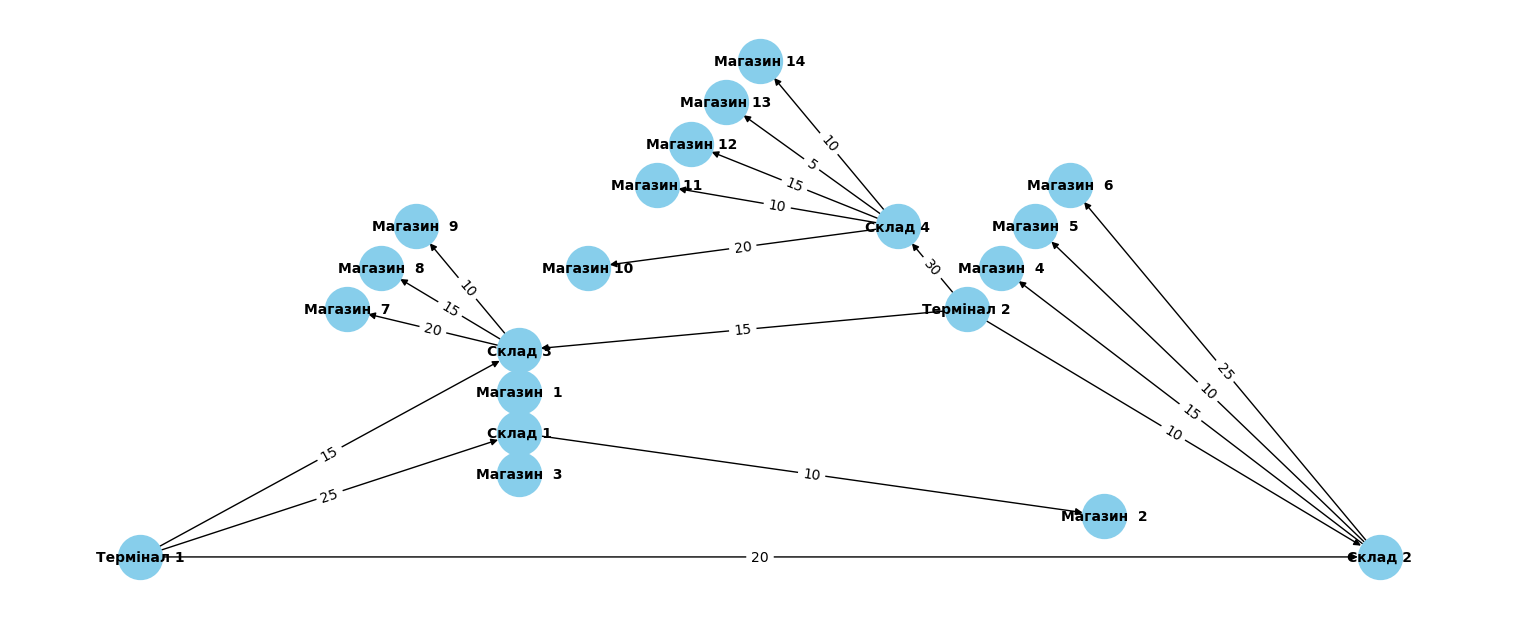

In [4]:
# Створюємо граф
G = nx.DiGraph()

# Додаємо всі ребра до графа
G.add_weighted_edges_from(edge_list)

# Позиції для малювання графа
pos = nx.planar_layout(G)

# Малюємо граф
plt.figure(figsize=(15, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    arrows=True,
)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Відображаємо граф
plt.show();

In [5]:
# список унікальних вершин
node_set = set()
for edge in edge_list:
    node_set.add(edge[0])
    node_set.add(edge[1])
node_list = list(node_set)
node_list.sort(reverse=True)
# pprint(node_list)

# Визначаємо джерела та стоки
source_list = list(filter(lambda x: x.startswith("Термінал"), node_list))
sink_list = list(filter(lambda x: x.startswith("Магазин"), node_list))

# Матриця пропускної здатності для каналів у мережі (capacity_matrix)
capacity_matrix = [[0 for i in range(len(node_list))] for j in range(len(node_list))]
for edge in edge_list:
    i = node_list.index(edge[0])
    j = node_list.index(edge[1])
    capacity_matrix[i][j] = edge[2]
#     capacity_matrix[j][i] = edge[2]
# capacity_matrix = np.array(capacity_matrix)

pprint(capacity_matrix)

[[0, 0, 30, 15, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 15, 20, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 10, 5, 15, 10, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 15, 20, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 10, 15, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 10, 15],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
# Функція для пошуку збільшуючого шляху (BFS)
def bfs(capacity_matrix, flow_matrix, source, sink, parent):
    visited = [False] * len(capacity_matrix)
    queue = deque([source])
    visited[source] = True

    while queue:
        current_node = queue.popleft()

        for neighbor in range(len(capacity_matrix)):
            # Перевірка, чи є залишкова пропускна здатність у каналі
            if (
                not visited[neighbor]
                and capacity_matrix[current_node][neighbor]
                - flow_matrix[current_node][neighbor]
                > 0
            ):
                parent[neighbor] = current_node
                visited[neighbor] = True
                if neighbor == sink:
                    return True
                queue.append(neighbor)

    return False


# Основна функція для обчислення максимального потоку
def edmonds_karp(capacity_matrix, source, sink):
    num_nodes = len(capacity_matrix)
    flow_matrix = [
        [0] * num_nodes for _ in range(num_nodes)
    ]  # Ініціалізуємо матрицю потоку нулем
    parent = [-1] * num_nodes
    max_flow = 0

    # Поки є збільшуючий шлях, додаємо потік
    while bfs(capacity_matrix, flow_matrix, source, sink, parent):
        # Знаходимо мінімальну пропускну здатність уздовж знайденого шляху (вузьке місце)
        path_flow = float("Inf")
        current_node = sink

        while current_node != source:
            previous_node = parent[current_node]
            path_flow = min(
                path_flow,
                capacity_matrix[previous_node][current_node]
                - flow_matrix[previous_node][current_node],
            )
            current_node = previous_node

        # Оновлюємо потік уздовж шляху, враховуючи зворотний потік
        current_node = sink
        while current_node != source:
            previous_node = parent[current_node]
            flow_matrix[previous_node][current_node] += path_flow
            flow_matrix[current_node][previous_node] -= path_flow
            current_node = previous_node

        # Збільшуємо максимальний потік
        max_flow += path_flow

    return max_flow

In [7]:
# Розраховуємо максимальні потоки для всіх пар терміналів і магазинів
# (термінал - джерело, магазин - стік)
terminal_flow_dict = {}
for source in source_list:
    terminal_flow_dict[source] = 0
    for sink in sink_list:
        source_index = node_list.index(source)
        sink_index = node_list.index(sink)
        flow = edmonds_karp(capacity_matrix, source_index, sink_index)

        terminal_flow_dict[source] += flow
        print(f"Максимальний потік з {source} до {sink}: {edmonds_karp(capacity_matrix, source_index, sink_index)}")

# виводимо загальний вихідний потік з терміналів
print("\n")
print("Загальний вихідний потік з терміналів:")
for source in source_list:
    print(f"Total flow engress flow from {source} is {terminal_flow_dict[source]}")

Максимальний потік з Термінал 2 до Магазин 14: 10
Максимальний потік з Термінал 2 до Магазин 13: 5
Максимальний потік з Термінал 2 до Магазин 12: 15
Максимальний потік з Термінал 2 до Магазин 11: 10
Максимальний потік з Термінал 2 до Магазин 10: 20
Максимальний потік з Термінал 2 до Магазин  9: 10
Максимальний потік з Термінал 2 до Магазин  8: 15
Максимальний потік з Термінал 2 до Магазин  7: 15
Максимальний потік з Термінал 2 до Магазин  6: 10
Максимальний потік з Термінал 2 до Магазин  5: 10
Максимальний потік з Термінал 2 до Магазин  4: 10
Максимальний потік з Термінал 2 до Магазин  3: 0
Максимальний потік з Термінал 2 до Магазин  2: 0
Максимальний потік з Термінал 2 до Магазин  1: 0
Максимальний потік з Термінал 1 до Магазин 14: 0
Максимальний потік з Термінал 1 до Магазин 13: 0
Максимальний потік з Термінал 1 до Магазин 12: 0
Максимальний потік з Термінал 1 до Магазин 11: 0
Максимальний потік з Термінал 1 до Магазин 10: 0
Максимальний потік з Термінал 1 до Магазин  9: 10
Максималь

Відповіді на запитання:
-----------------------
1. Обидва термінали забезпечують рівний потік до магазинів = 130 одиниць.
2. Якщо не враховувати маршрути з нульовою пропускною здатністю, то маршрут з Терміналу 2 до Магазину 13 має найнижчу пропускну здатність.
3. Магазин 13 отримав найменше товарів через низьку пропускну здатність маршруту Склад 4 - Магазин 13. Щоб збільшити постачання до Магазину 13, треба збільшити пропускну здатність маршруту Склад 4 - Магазин 13 до рівня >5.
4. Щоб збільшити пропукну здатність мережі треба "розшити" вузькі місця на маршрутах з'єднання таких Терміналів та Складів: Термінал 2 - Склад 2, Термінал 2 - Склад 3, Термінал 1 - Склад 3. 